In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

In [2]:
# COLOUR BAR INCRIMENTS OF 10 

## Plotting preferences

In [3]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 50

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

In [14]:
detection_colours = sns.color_palette("hls", 4)
detection_colours

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [15]:
dark_colours = sns.color_palette("viridis", 8)
dark_colours

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [16]:
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [17]:
cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

In [18]:
alpha = 0.7

## Data 

In [19]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,Condition 4,Detection,Astrometric Signature,Stellar Mass,Scaling Factor,Distance,Semi-Major Axis,Sigma fov,Noise,S/N
0,288.503923,-68.088209,-44.551743,-37.022875,10.061523,288.503923,-68.088209,-44.551743,-37.022875,10.061523,...,0,0,56.262094,0.154116,1.272583,99.388534,1.136793,333.149854,471.145042,0.151966
1,138.039973,-3.377097,-163.019718,-32.490641,11.956663,138.039973,-3.377097,-163.019718,-32.490641,11.956663,...,0,0,1.022224,0.302706,10.244061,83.635376,0.088245,96.705137,136.761717,0.076569
2,286.695890,-0.244781,-3.752077,-4.259140,10.096390,286.695890,-0.244781,-3.752077,-4.259140,10.096390,...,0,0,18.653842,0.078149,21.004269,99.045303,0.021571,427.687033,604.840802,0.647791
3,115.135052,0.740534,26.853094,-84.685793,10.182806,115.135052,0.740534,26.853094,-84.685793,10.182806,...,0,0,36.973503,0.386243,3.250046,98.204759,0.442331,91.103628,128.839986,0.932673
4,262.038776,-14.041731,3.605326,-100.931148,17.001777,262.038776,-14.041731,3.605326,-100.931148,17.001777,...,0,0,0.974203,0.440679,16.434061,58.817380,0.053255,42.230649,59.723156,0.268072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,282.780442,12.718451,8.229683,-11.514563,11.754215,282.780442,12.718451,8.229683,-11.514563,11.754215,...,0,0,223.892367,0.073716,1.132350,85.075868,1.038787,642.528879,908.673054,0.279005
9996,24.961276,20.537176,47.458743,-84.013850,16.444935,24.961276,20.537176,47.458743,-84.013850,16.444935,...,0,0,17.471990,0.519612,3.435857,60.808996,0.453412,38.329614,54.206261,1.107460
9997,174.263014,-4.139514,20.895641,-87.415298,12.324102,174.263014,-4.139514,20.895641,-87.415298,12.324102,...,0,0,9.774783,0.175999,18.785303,81.141817,0.032814,167.592378,237.011414,0.774740
9998,288.104504,-29.673692,5.719830,-123.392905,11.458365,288.104504,-29.673692,5.719830,-123.392905,11.458365,...,0,0,7.164172,0.263144,11.641484,87.272488,0.071018,113.439746,160.428028,0.519869


In [20]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition 1', 'Condition 2', 'Condition 3',
       'Condition 4', 'Detection', 'Astrometric Signature', 'Stellar Mass',
       'Scaling Factor', 'Distance', 'Semi-Major Axis', 'Sigma fov', 'Noise',
       'S/N'],
      dtype='object')

In [21]:
df['Distance'].max()

99.99579950276438

## Planetary Mass and Orbital Period 

##### Bins
- Mass bins are in units of $M_J$
- Period bins are in units of years
- The bins are evenly spaced in logspace

In [22]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(13), 20) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

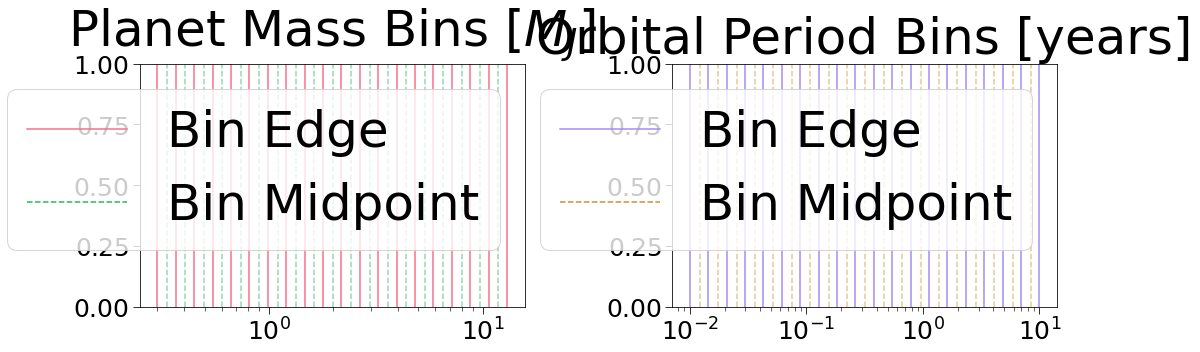

In [23]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot mass bin edges 
for bin_edge in Mbins:
    axs[0].axvline(x=bin_edge, color=my_colours[0], linestyle='-', alpha=1)

# Plot mass bin midpoints
for midpoint in Mbin_midpoints:
    axs[0].axvline(x=midpoint, color=my_colours[3], linestyle='--', alpha=0.5)

# Plot period bin edges
for bin_edge in Pbins:
    axs[1].axvline(x=bin_edge, color=my_colours[-2], linestyle='-', alpha=1)
    
# Plot period bin midpoints
for midpoint in Pbin_midpoints:
    axs[1].axvline(x=midpoint, color=my_colours[1], linestyle='--', alpha=0.5)

# Plot titles
axs[0].set_title('Planet Mass Bins [$M_J$]', fontsize=title_font)
axs[1].set_title('Orbital Period Bins [years]', fontsize=title_font)

for i in range(2):
    # Set axis ticks 
    axs[i].tick_params(labelsize=axis_numbers_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)
    
    # Make axis numbers not scientific notation
    axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    # Make x-axis log 
    axs[i].set_xscale('log')

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=my_colours[0], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[3], linestyle='--', label='Bin Midpoint')]
axs[0].legend(handles=handles, fontsize=legend_font)

handles = [plt.Line2D([], [], color=my_colours[-2], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[1], linestyle='--', label='Bin Midpoint')]
axs[1].legend(handles=handles, fontsize=legend_font)


# Adjust layout
plt.tight_layout()

In [ ]:
# Data in non-log units
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]

rec_mass_data   = 10**df['Rec.1P log(m_p)'] # [M_J]
rec_period_data = 10**df['Rec.1P log(P)'] # [years]

In [ ]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(23,10))

# Plot scatter for mass
axs[0].scatter(10**df['Inj.1P log(m_p)'], 
               10**df['Rec.1P log(m_p)'],
               color = dark_colours[1])

# Plot line for mass
axs[0].plot(10**df['Inj.1P log(m_p)'], 
            10**df['Inj.1P log(m_p)'],
            color = 'red',
            lw = 2)


axs[1].scatter(10**df['Inj.1P log(P)'], 
               10**df['Rec.1P log(P)'], 
               color = dark_colours[1])

axs[1].plot(10**df['Inj.1P log(P)'], 
            10**df['Inj.1P log(P)'],
            color = 'red',
            lw = 2)

# Plot titles
# axs[0].set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=title_font)
# axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=title_font)

axs[0].set_xlabel('Inj. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)
axs[0].set_ylabel('Rec. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)


axs[1].set_xlabel('Inj. Orbital Period [years]', fontsize=axis_label_font)
axs[1].set_ylabel('Rec. Orbital Period [years]', fontsize=axis_label_font)

for i in range(2):
    # Make axes log
#     axs[i].set_xscale('log')
#     axs[i].set_yscale('log')
    
    # Make axes decimals and not scientific notation
#     axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
#     axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
    # Set axis number size 
    axs[i].tick_params(labelsize=axis_numbers_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3)

# Add (a), (b), (c), (d)
axs[0].text(0.05, 0.9, '(a)', transform=axs[0].transAxes, fontsize=axis_label_font)
axs[1].text(0.05, 0.9, '(b)', transform=axs[1].transAxes, fontsize=axis_label_font)

# Adjust layout
# plt.tight_layout()

plt.savefig(path + 'InjvsRecParameters.pdf', dpi=300)

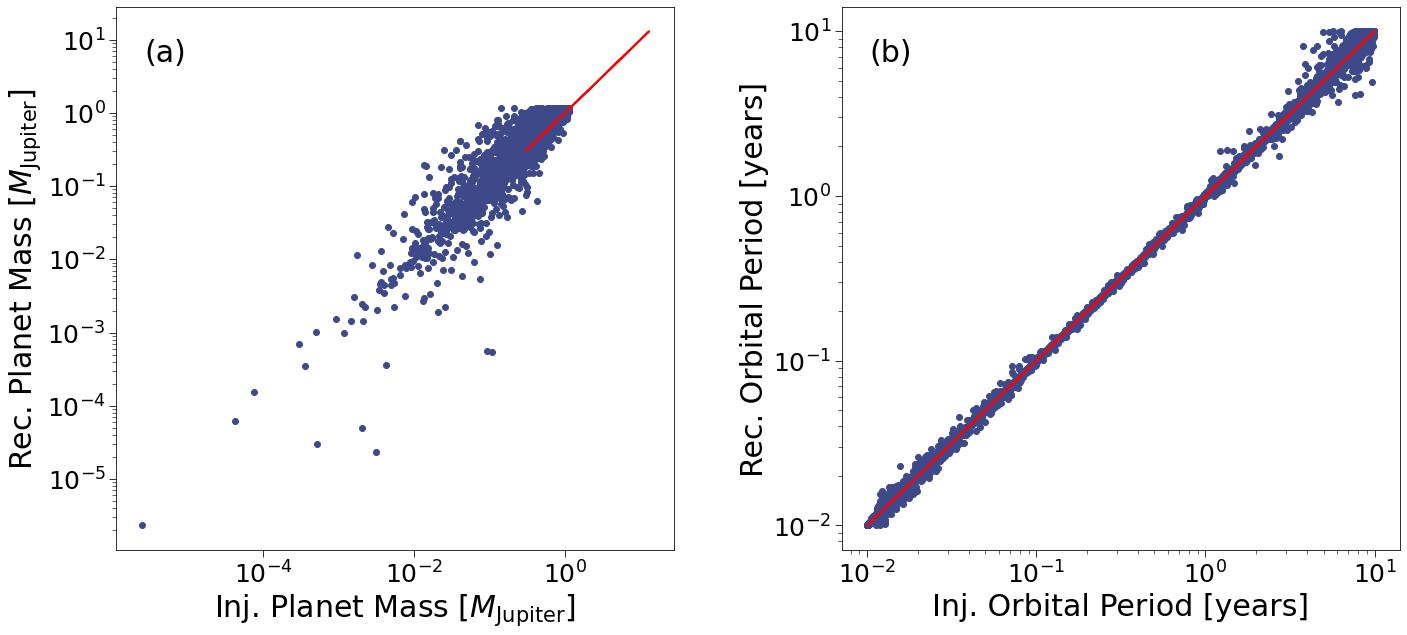

In [24]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(23,10))

# Plot scatter for mass
axs[0].scatter(df['Inj.1P log(m_p)'], 
               df['Rec.1P log(m_p)'],
               color = dark_colours[1])

# Plot line for mass
axs[0].plot(10**df['Inj.1P log(m_p)'], 
            10**df['Inj.1P log(m_p)'],
            color = 'red',
            lw = 2)


axs[1].scatter(10**df['Inj.1P log(P)'], 
               10**df['Rec.1P log(P)'], 
               color = dark_colours[1])

axs[1].plot(10**df['Inj.1P log(P)'], 
            10**df['Inj.1P log(P)'],
            color = 'red',
            lw = 2)

# Plot titles
# axs[0].set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=title_font)
# axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=title_font)

axs[0].set_xlabel('Inj. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)
axs[0].set_ylabel('Rec. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)


axs[1].set_xlabel('Inj. Orbital Period [years]', fontsize=axis_label_font)
axs[1].set_ylabel('Rec. Orbital Period [years]', fontsize=axis_label_font)

for i in range(2):
    # Make axes log
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    # Make axes decimals and not scientific notation
#     axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
#     axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
    # Set axis number size 
    axs[i].tick_params(labelsize=axis_numbers_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.3)

# Add (a), (b), (c), (d)
axs[0].text(0.05, 0.9, '(a)', transform=axs[0].transAxes, fontsize=axis_label_font)
axs[1].text(0.05, 0.9, '(b)', transform=axs[1].transAxes, fontsize=axis_label_font)

# Adjust layout
# plt.tight_layout()

plt.savefig(path + 'InjvsRecParameters.pdf', dpi=300)

In [ ]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 1, figsize=(10,9))

# Plot scatter for mass
axs.scatter(10**df['Inj.1P log(m_p)'], 
               10**df['Rec.1P log(m_p)'],
               color = dark_colours[1])

# Plot line for mass
axs.plot(10**df['Inj.1P log(m_p)'], 
            10**df['Inj.1P log(m_p)'],
            color = 'red',
            lw = 2)

# Plot titles
# axs.set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=title_font)
# axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=title_font)

axs.set_xlabel('Inj. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)
axs.set_ylabel('Rec. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)



# Make axes log
axs.set_xscale('log')
axs.set_yscale('log')
    
# Make axes decimals and not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Add (a)
axs.text(0.05, 0.9, '(a)', transform=axs.transAxes, fontsize=axis_label_font)


# axs.axvline(x=1, color='r', linestyle='--')



# Adjust layout
plt.tight_layout()

plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 1, figsize=(10,9))

axs.scatter(10**df['Inj.1P log(P)'], 
               10**df['Rec.1P log(P)'], 
               color = dark_colours[1])

axs.plot(10**df['Inj.1P log(P)'], 
            10**df['Inj.1P log(P)'],
            color = 'red',
            lw = 2)

axs.set_xlabel('Inj. Orbital Period [years]', fontsize=axis_label_font)
axs.set_ylabel('Rec. Orbital Period [years]', fontsize=axis_label_font)

# Make axes log
axs.set_xscale('log')
axs.set_yscale('log')
    
# Make axes decimals and not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# add (b)
axs.text(0.05, 0.9, '(b)', transform=axs.transAxes, fontsize=axis_label_font)


# axs.axvline(x=0.2, color='r', linestyle='--')
# axs.axvline(x=1.5, color='r', linestyle='--')


# Adjust layout
plt.tight_layout()


plt.savefig(path + 'InjvsRecPeriod.pdf', dpi=300)

In [25]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 2, figsize=(12,7))

# # Plot histogram for m_planet
# axs[0].hist(injected_mass_data, # [M_J]
#             bins=Mbins, 
#             color=my_colours[0], 
#             edgecolor='black')

# # Plot histogram for P
# axs[1].hist(injected_period_data, # [years]
#             bins=Pbins, 
#             color=my_colours[-2], 
#             edgecolor='black')


# # Plot titles
# axs[0].set_title('Histogram of Planet Mass', fontsize=big_font)
# axs[1].set_title('Histogram of Orbital Period', fontsize=big_font)

# # Axes scale 
# axs[0].set_xscale('log')
# axs[1].set_xscale('log')

# # Axes labels 
# axs[0].set_xlabel('Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=medium_font)
# axs[1].set_xlabel('Orbital Period [years] ', fontsize=medium_font)

# for i in range(2):
#     axs[i].tick_params(labelsize=small_font, which='major', length=7)
#     axs[i].tick_params(which='minor', length=4)


# # Adjust layout
# plt.tight_layout()

# # Making axes labels not scientific notation
# axs[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# axs[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# # Show the plot
# plt.show()

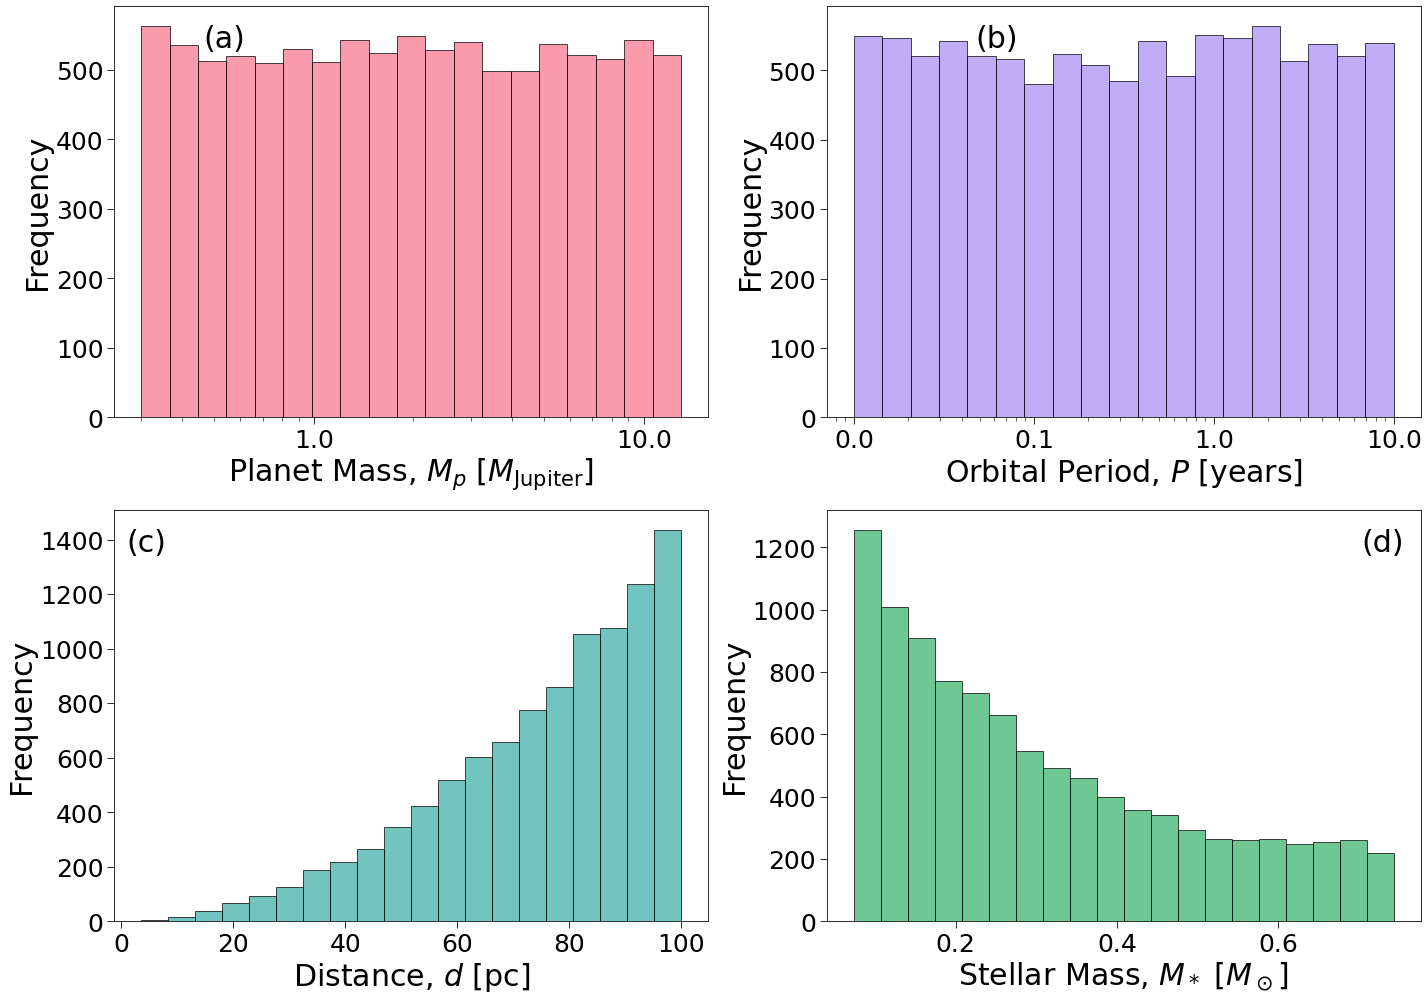

In [26]:
# Create a 4x4 figure of histograms
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Plot histogram for m_planet (top left)
axs[0, 0].hist(inj_mass_data, # [M_J]
            bins=Mbins, 
            color=my_colours[0],
            alpha=alpha, 
            edgecolor='black')

# Plot histogram for P (top right)
axs[0, 1].hist(inj_period_data, # [years]
            bins=Pbins, 
            color=my_colours[6],
            alpha=alpha, 
            edgecolor='black')

# Plot histogram for distance (bottom left)
axs[1, 0].hist(df['Distance'], # [pc]
            bins=20, 
            color=my_colours[4], 
            alpha=alpha, 
            edgecolor='black')

# Plot histogram stellar mass (bottom right)
axs[1, 1].hist(df['Stellar Mass'], # [m_star]
            bins=20, 
            color=my_colours[3], 
            alpha=alpha, 
            edgecolor='black')


# Axes labels 
axs[0, 0].set_xlabel('Planet Mass, $M_p$ [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)
axs[0, 1].set_xlabel('Orbital Period, $P$ [years]', fontsize=axis_label_font)
axs[1, 0].set_xlabel('Distance, $d$ [pc]', fontsize=axis_label_font)
axs[1, 1].set_xlabel('Stellar Mass, $M_*$ [$M_\odot$]', fontsize=axis_label_font)

for i in range(2):
    for j in range(2):
        axs[i, j].set_ylabel('Frequency', fontsize=axis_label_font)
        axs[i, j].tick_params(labelsize=axis_numbers_font, which='major', length=7)
        axs[i, j].tick_params(which='minor', length=4)

for i in range(1):
    for j in range(2):
        # Make x-axis log
        axs[i, j].set_xscale('log')
        
        # Make axes not scientific notation
        axs[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        # axs[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Add (a), (b), (c), (d)
axs[0, 0].text(0.15, 0.9, '(a)', transform=axs[0, 0].transAxes, fontsize=axis_label_font)
axs[0, 1].text(0.25, 0.9, '(b)', transform=axs[0, 1].transAxes, fontsize=axis_label_font)
axs[1, 0].text(0.02, 0.9, '(c)', transform=axs[1, 0].transAxes, fontsize=axis_label_font)
axs[1, 1].text(0.90, 0.9, '(d)', transform=axs[1, 1].transAxes, fontsize=axis_label_font)

# Adjust layout
plt.tight_layout()

plt.savefig(path + '4ParameterHistogram.pdf', dpi=300)

In [ ]:
print('Planet Mass: min=', inj_mass_data.min(), 'max = ', inj_mass_data.max())
print('Orbital Period: min=', inj_period_data.min(), 'max = ', inj_period_data.max())
print('Distance: min=', df['Distance'].min(), 'max = ', df['Distance'].max())
print('Stellar Mass: min=', df['Stellar Mass'].min(), 'max = ', df['Stellar Mass'].max())

## Detection

In [27]:
detection_data = df['Detection']

In [28]:
# Sample data
conditions = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Detection']

pass_c1 = np.sum(df['Condition 1'])
pass_c2 = np.sum(df['Condition 2'])
pass_c3 = np.sum(df['Condition 3'])
pass_c4 = np.sum(df['Condition 4'])  
pass_det = np.sum(df['Detection'])

fail_c1 = len(df['Condition 1']) - pass_c1
fail_c2 = len(df['Condition 2']) - pass_c2
fail_c3 = len(df['Condition 3']) - pass_c3
fail_c4 = len(df['Condition 4']) - pass_c4
fail_det = len(df['Detection'])  - pass_det

pass_counts = [pass_c1, pass_c2, pass_c3, pass_c4, pass_det]  # Number of signals passing each condition
fail_counts = [fail_c1, fail_c2, fail_c3, fail_c4, fail_det]  # Number of signals failing each condition

# Calculate total counts (pass + fail) for each condition
total_counts = np.array(pass_counts) + np.array(fail_counts)

In [29]:
print('The total number of systems are:', len(df['Condition 1']))
print(' ')
print('Condition 1')
print('Pass Count:', pass_c1)
print('Pass %:', pass_c1/ 10000)
print('Fail Count:', fail_c1)
print('Fail %:', fail_c1/ 10000)
print(' ')
print('Condition 2')
print('Pass Count:', pass_c2)
print('Pass %:', pass_c2/ 10000)
print('Fail Count:', fail_c2)
print('Fail %:', fail_c2/ 10000)
print(' ')
print('Condition 3')
print('Pass Count:', pass_c3)
print('Pass %:', pass_c3/ 10000)
print('Fail Count:', fail_c3)
print('Fail %:', fail_c3/ 10000)
print(' ')
print('Condition 4')
print('Pass Count:', pass_c4)
print('Pass %:',pass_c4/ 10000 )
print('Fail Count:', fail_c4)
print('Fail %:', fail_c4/ 10000)
print(' ')
print('Detection')
print('Pass Count:', pass_det)
print('Pass %:', pass_det/ 10000)
print('Fail Count:', fail_det)
print('Fail %:', fail_det/ 10000)

The total number of systems are: 10000
 
Condition 1
Pass Count: 5948
Pass %: 0.5948
Fail Count: 4052
Fail %: 0.4052
 
Condition 2
Pass Count: 9093
Pass %: 0.9093
Fail Count: 907
Fail %: 0.0907
 
Condition 3
Pass Count: 4380
Pass %: 0.438
Fail Count: 5620
Fail %: 0.562
 
Condition 4
Pass Count: 2205
Pass %: 0.2205
Fail Count: 7795
Fail %: 0.7795
 
Detection
Pass Count: 1536
Pass %: 0.1536
Fail Count: 8464
Fail %: 0.8464


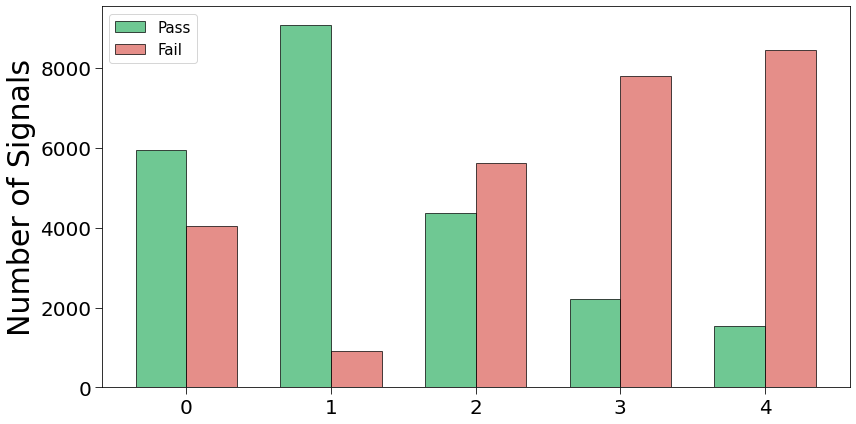

In [30]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6)) 


x = np.arange(len(conditions))
bar_width = 0.35
# Stacked bar plot
# ax.bar(conditions, 
#         pass_counts, 
#         color=my_colours[3],
#         edgecolor='black',
#         alpha = alpha,
#         label='Pass')

# ax.bar(conditions, 
#         fail_counts, 
#         bottom=pass_counts, 
#         color=detection_colours[0], 
#         edgecolor='black',
#         alpha = alpha,
#         label='Fail')

ax.bar(x - bar_width/2, 
       pass_counts, 
       bar_width, 
       color=my_colours[3], 
       label='Pass', 
       edgecolor='black',
       alpha = alpha)

ax.bar(x + bar_width/2, 
       fail_counts, 
       bar_width, 
       color=detection_colours[0], 
       label='Fail', 
       edgecolor='black',
       alpha = alpha)


#ax.set_xlabel('Conditions',fontsize = paper_axis_label_fs)
ax.set_ylabel('Number of Signals', fontsize = axis_label_font)

# plt.title('Pass/Fail Ratio for Each Condition', fontsize=paper_title_fs)

ax.tick_params(labelsize=20, which='major', length=7)
ax.tick_params(which='minor', length=4)
        

plt.legend(fontsize = 15)

plt.tight_layout()

plt.savefig(path + 'DetectionConditionPlot.pdf')

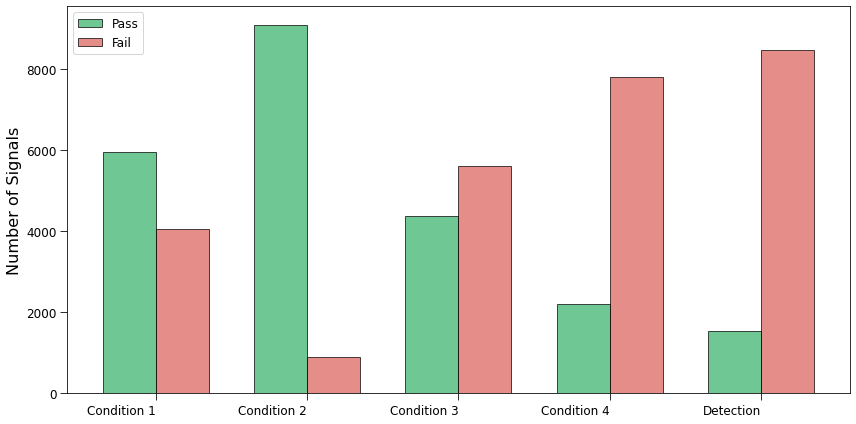

In [31]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6)) 


# Define width of each bar
bar_width = 0.35

# Define positions for the bars
x = np.arange(len(conditions))

# Plotting

# Grouped bar plot
ax.bar(x - bar_width/2, 
       pass_counts, 
       bar_width, 
       color=my_colours[3], 
       label='Pass', 
       edgecolor='black',
       alpha = alpha)

ax.bar(x + bar_width/2, 
       fail_counts, 
       bar_width, 
       color=detection_colours[0], 
       label='Fail', 
       edgecolor='black',
       alpha = alpha)

# Set labels and title
ax.set_ylabel('Number of Signals', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(conditions, ha='right')
ax.legend(fontsize=12)

# Plotting ticks 
ax.tick_params(labelsize=12, which='major', length=7)
ax.tick_params(which='minor', length=4)

plt.tight_layout()


plt.tight_layout()

plt.savefig(path + 'DetectionConditionPlot_Grouped.pdf')
plt.show()


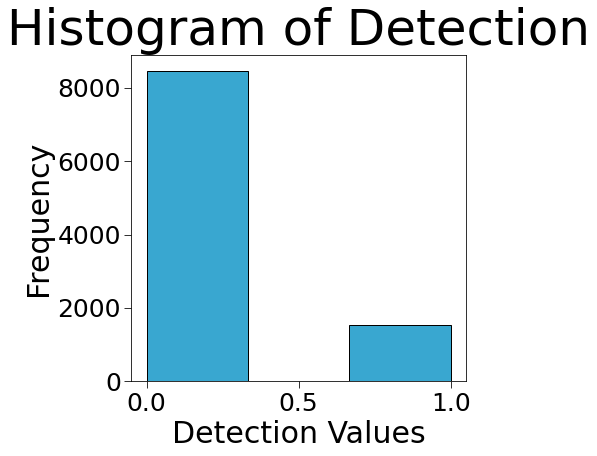

In [32]:
# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(6, 6))  

# Plot histogram for detection data
ax.hist(detection_data, 
        bins=3, 
        color=my_colours[-3], 
        edgecolor='black')  # Adjust the number of bins as needed

# Titles and axes
ax.set_title('Histogram of Detection', fontsize=title_font)
ax.set_xlabel('Detection Values', fontsize=axis_label_font)
ax.set_ylabel('Frequency', fontsize=axis_label_font)

# Adjust ticks
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)
    
# Show the plot
plt.show()

## Making detection data 

In [33]:
# Making arrays we will fill in the for loop 
num_planets_per_bin   = np.zeros((num_Pbins, num_Mbins))
num_detected          = np.zeros((num_Pbins, num_Mbins))
sensitivity           = np.zeros((num_Pbins, num_Mbins))
detection_uncertainty = np.zeros((num_Pbins, num_Mbins))

num_condition_1 = np.zeros((num_Pbins, num_Mbins))
num_condition_2 = np.zeros((num_Pbins, num_Mbins))
num_condition_3 = np.zeros((num_Pbins, num_Mbins))
num_condition_4 = np.zeros((num_Pbins, num_Mbins))

### $\text{Detection uncertainty} = \frac{\sqrt{\text{# of detections in bin}}}{\text{# of planets in bin}}$

In [34]:
# # Iterate through each period bin
# for i, p in enumerate(Pbins[:-1]):
#     # Iterate through each mass bin
#     for j, m in enumerate(Mbins[:-1]):
        
#         # Mask to determine if data falls within the current period-mass bin
#         mask = (inj_mass_data >= Mbins[j]) & (inj_mass_data < Mbins[j+1]) & (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])
        
#         # Determine the number of detected planets in the current bin
#         detected = mask & (detection_data == 1)
#         condition_1 = mask & (df['Condition 1'] == 1)
#         condition_2 = mask & (df['Condition 2'] == 1)
#         condition_3 = mask & (df['Condition 3'] == 1)
#         condition_4 = mask & (df['Condition 4'] == 1)
        
#         # Find the number of planets/data points in the current bin
#         num_planets_per_bin[i, j] = mask.sum()
        
#         # Find the number of detected planets in the current bin
#         num_detected[i, j] = detected.sum()
#         num_condition_1[i,j] = condition_1.sum()
#         num_condition_2[i,j] = condition_2.sum()
#         num_condition_3[i,j] = condition_3.sum()
#         num_condition_4[i,j] = condition_4.sum()

# sensitivity = num_detected / num_planets_per_bin
# detection_uncertainty = np.sqrt(num_detected) / num_planets_per_bin
# pass_fraction_condition_1 = num_condition_1/ num_planets_per_bin
# pass_fraction_condition_2 = num_condition_2/ num_planets_per_bin
# pass_fraction_condition_3 = num_condition_3/ num_planets_per_bin
# pass_fraction_condition_4 = num_condition_4/ num_planets_per_bin

In [35]:
# Iterate through each period bin
for i, p in enumerate(Pbins[:-1]):
    # Iterate through each mass bin
    for j, m in enumerate(Mbins[:-1]):
        
        # Mask to determine if data falls within the current period-mass bin
        mask = (inj_mass_data >= Mbins[j]) & (inj_mass_data < Mbins[j+1]) & (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])
        
        # Determine the number of detected planets in the current bin
        detected = mask & (detection_data == 1)
        condition_1 = mask & (df['Condition 1'] == 1)
        condition_2 = mask & (df['Condition 2'] == 1)
        condition_3 = mask & (df['Condition 3'] == 1)
        condition_4 = mask & (df['Condition 4'] == 1)
        
        # Find the number of planets/data points in the current bin
        num_planets_per_bin[i, j] = mask.sum()
        
        # Find the number of detected planets in the current bin
        num_detected[i, j] = detected.sum()
        num_condition_1[i,j] = condition_1.sum()
        num_condition_2[i,j] = condition_2.sum()
        num_condition_3[i,j] = condition_3.sum()
        num_condition_4[i,j] = condition_4.sum()

        
sensitivity = num_detected / num_planets_per_bin
detection_uncertainty = np.sqrt(num_detected) / num_planets_per_bin
pass_fraction_condition_1 = num_condition_1/ num_planets_per_bin
pass_fraction_condition_2 = num_condition_2/ num_planets_per_bin
pass_fraction_condition_3 = num_condition_3/ num_planets_per_bin
pass_fraction_condition_4 = num_condition_4/ num_planets_per_bin

In [36]:
print('Minimum uncertainty: ', detection_uncertainty.min())
print('Maximum uncertainty: ', detection_uncertainty.max())

Minimum uncertainty:  0.0
Maximum uncertainty:  0.2037706832433973


In [37]:
# Empty cells occur where the sensitivity was set to -1
empty_cells = np.where(sensitivity == -1, -1, np.nan)

# Find and print the number of empty cells
num_empty_cells = np.sum(empty_cells == -1)
print('There are', num_empty_cells, 'empty cells')

There are 0 empty cells


# Plot: Period, mass, detection %
- x-axis: Period (years)
- y-axis: Mass ($M_J$)
- Axes should both be log 
- plot with plt.pcolormesh(period, mass, sensitivity.T)
- set to negative - set colour 

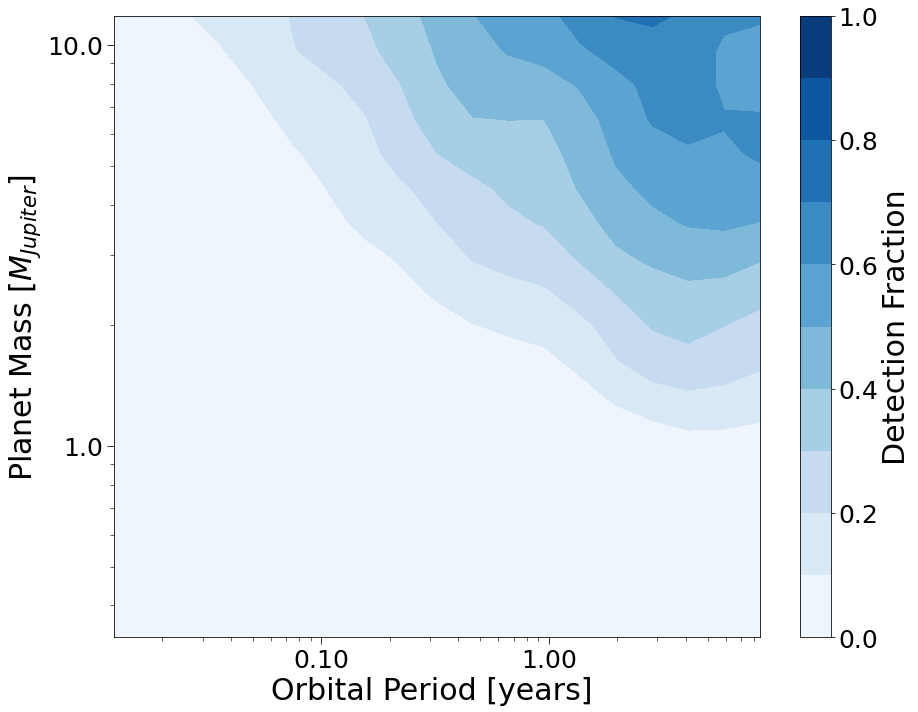

In [38]:
levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

cbar_ticks = [0, 0.2,0.4, 0.6, 0.8, 1]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(sensitivity.T, 1),
                 cmap='Blues',
                 levels=levels, #10,
                 vmin=0, 
                 vmax=1)


# Color bar
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')


# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'SensitivitySmooth.pdf', dpi= 300)

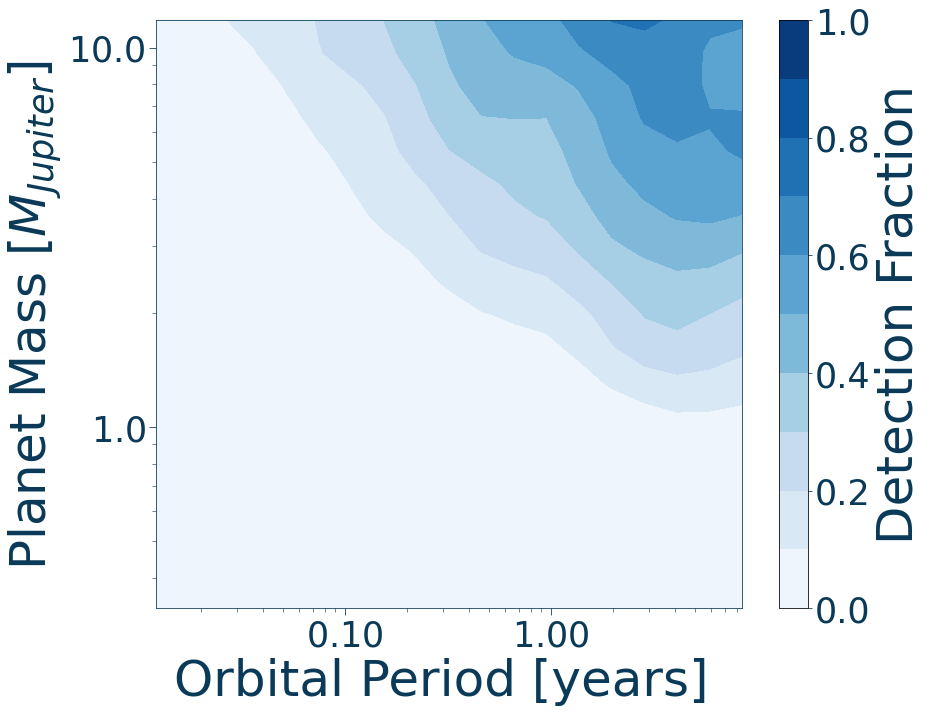

In [39]:
dark_blue = (10/255,58/255, 88/255)

axis_label_ss_font = 50
axis_numbers_ss_font = 35


# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(sensitivity.T, 1),
                 cmap='Blues',
                 levels=levels, #10,
                 vmin=0,
                 vmax=1)

# Change text color to white
plt.rcParams['text.color'] = dark_blue

# Change tick color to white
ax.tick_params(axis='both', colors=dark_blue)


# Change axis labels color to white
ax.xaxis.label.set_color(dark_blue)
ax.yaxis.label.set_color(dark_blue)

# Change offset text color to white
ax.yaxis.offsetText.set_color(dark_blue)
ax.xaxis.offsetText.set_color(dark_blue)

ax.spines['bottom'].set_color(dark_blue)
ax.spines['top'].set_color(dark_blue)
ax.spines['left'].set_color(dark_blue)
ax.spines['right'].set_color(dark_blue)


# Color bar
# Color bar
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=axis_label_ss_font, color=dark_blue)
cbar.ax.tick_params(labelsize=axis_numbers_ss_font, colors=dark_blue)  # Set tick color to red


# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_ss_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_ss_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_ss_font, which='major', length=7)
ax.tick_params(which='minor', length=4, color=dark_blue)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')


# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

plt.savefig('/Users/audreyburggraf/Desktop/THESIS/Figures/Slideshow/SensitivitySmooth.png', 
            dpi= 300, 
            transparent = True)

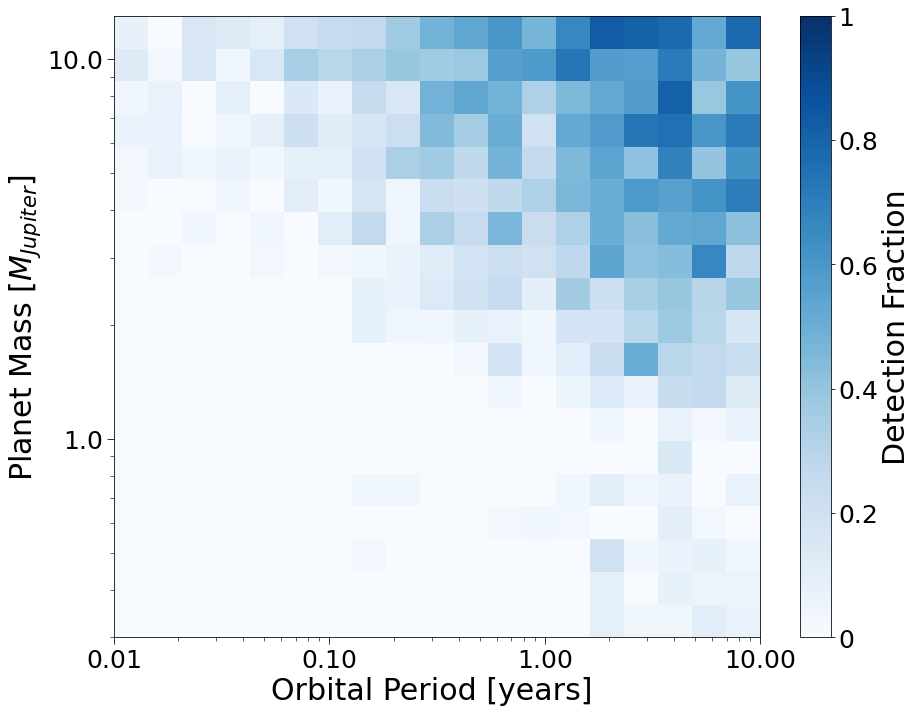

In [40]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
         

im = ax.pcolormesh(Pbins,
                   Mbins,
                   sensitivity.T,
                   cmap='Blues',
                   vmin=0,
                   vmax=1)


# Color bar
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')


# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'SensitivityNoSmooth.pdf', dpi= 300)

In [41]:
print('min = ' ,sensitivity.min())
print('max = ' ,sensitivity.max())
print('Mean:', np.mean(sensitivity))

min =  0.0
max =  0.8285714285714286
Mean: 0.1538635204154102


In [42]:
# Assuming detection_uncertainty is your 19x19 array
max_index = np.unravel_index(np.argmax(sensitivity), sensitivity.shape)
max_index

(14, 18)

# Occurence Plot

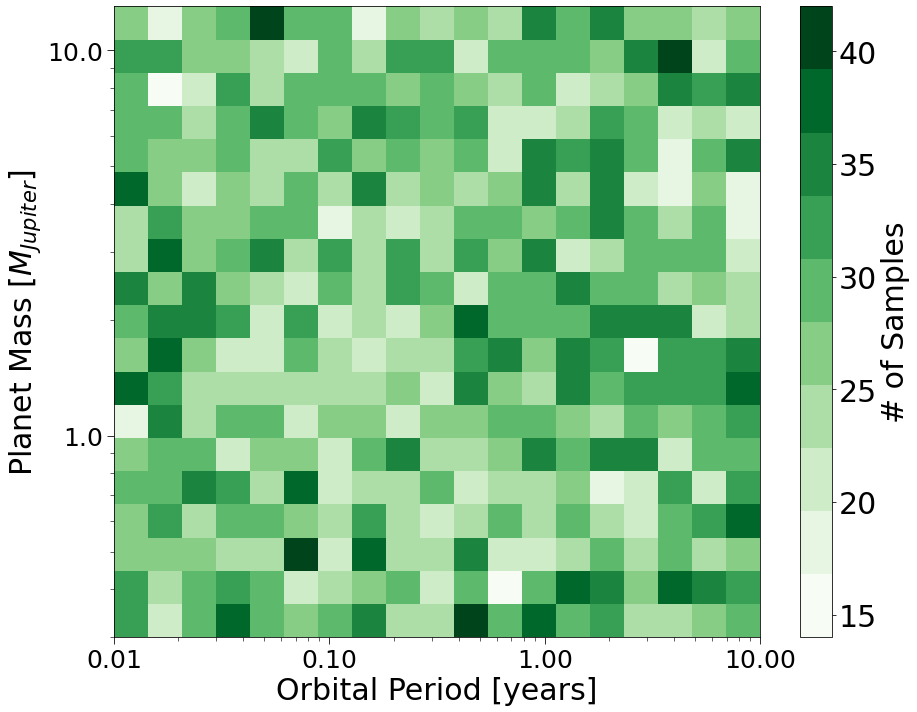

In [43]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

# Plotting main heatmap
im = ax.pcolormesh(Pbins,
                   Mbins,
                   num_planets_per_bin.T,
                   # cmap='Greens',
                   cmap = cmap_greens,
                   vmin=num_planets_per_bin.min(),
                   vmax=num_planets_per_bin.max())

# Color bar setup
cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
cbar.set_label('# of Samples', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_label_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    
# Adjust layout
plt.tight_layout()

plt.savefig(path + 'OccurencePlot.pdf', dpi= 300)

In [ ]:
print('Min occurence:', num_planets_per_bin.min())
print('Max occurence:', num_planets_per_bin.max())
print('Mean:', np.mean(num_planets_per_bin))

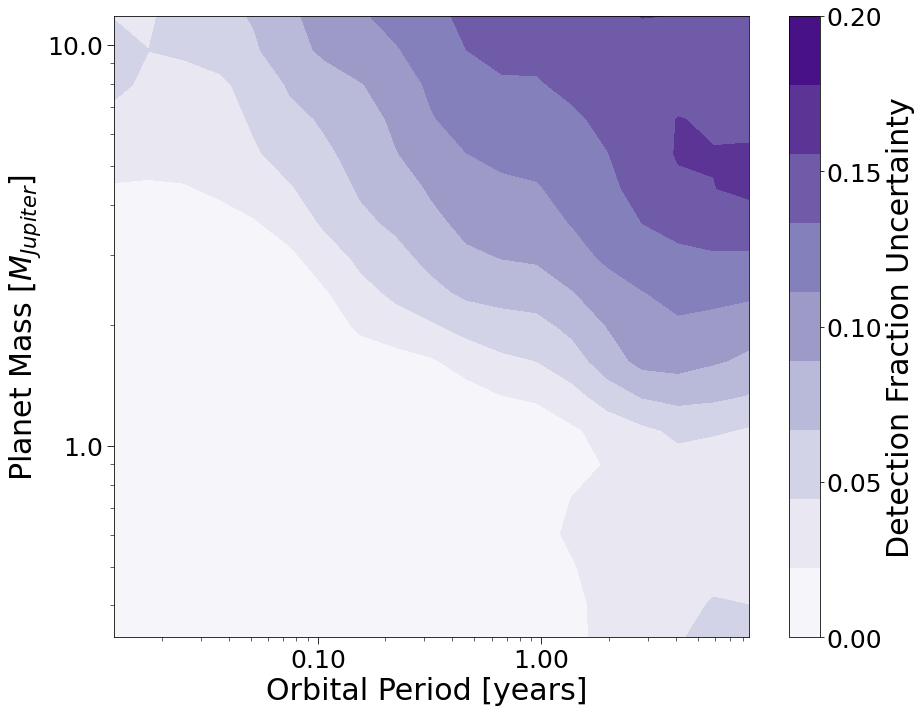

In [47]:
uncertainty_cbar_ticks = [0, 0.05,0.1, 0.15, 0.2]
uncertainty_levels = np.linspace(0, 0.2, 10)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(detection_uncertainty.T, 1),
                 cmap='Purples',
                 levels= uncertainty_levels)



# Color bar
cbar = plt.colorbar(im, ticks=uncertainty_cbar_ticks, orientation='vertical')
cbar.set_label('Detection Fraction Uncertainty', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'UncertaintyPlot_Smooth.pdf', dpi= 300)

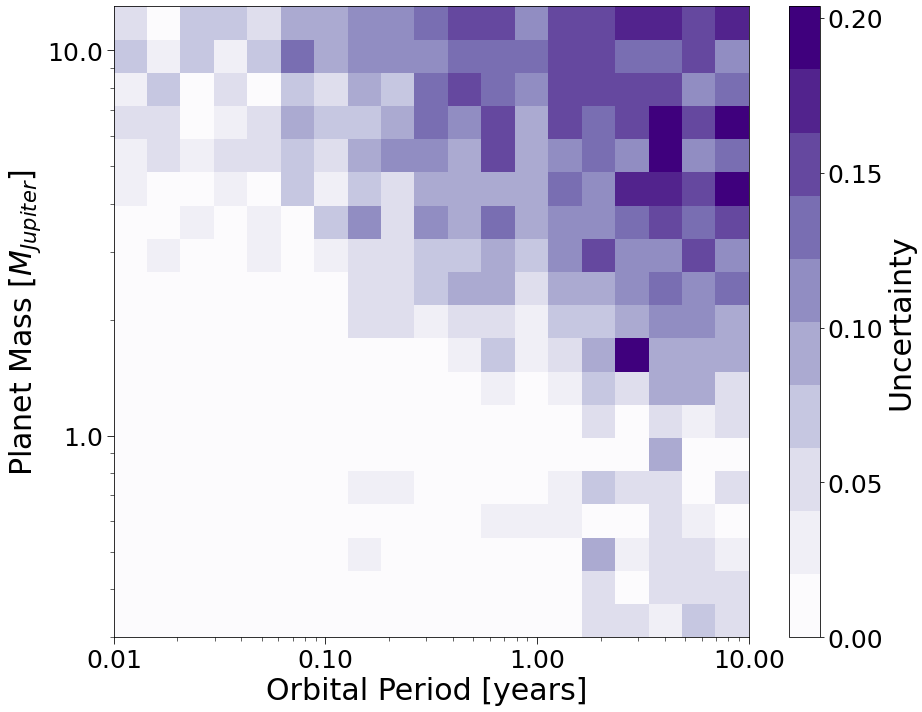

In [45]:
uncertainty_cbar_ticks = [0, 0.05,0.1, 0.15, 0.2]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

             
im = ax.pcolormesh(Pbins,
                   Mbins,
                   detection_uncertainty.T,
                   # cmap='Purples',
                   cmap = cmap_purples,
                   vmin=detection_uncertainty.min(),
                   vmax=detection_uncertainty.max())


# Color bar
cbar = plt.colorbar(im, ticks=uncertainty_cbar_ticks, orientation='vertical')
cbar.set_label('Uncertainty', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'UncertaintyPlot.pdf', dpi= 300)

In [ ]:
max_index

In [ ]:
sensitivity.max()

In [ ]:
sensitivity[14,18]

In [ ]:
detection_uncertainty[14,18]

# Detection Plot

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(num_detected.T, 1),
                 cmap='Reds',
                 levels=levels)

# # Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_detected.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('# of Detected Samples', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(e)', transform=ax.transAxes, fontsize=axis_label_font)

plt.savefig(path + 'DetectionPlot.pdf', dpi= 300)

In [ ]:
print('min = ' ,num_detected.min())
print('max = ' ,num_detected.max())
print('Mean:', np.mean(num_detected))

# Conditions Plot

In [ ]:
conditions_levels = np.linspace(0, 1, num=15)
conditions_levels

In [ ]:


# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_1.T, 1),
                 cmap='Reds',
                 levels=conditions_levels)


# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_1.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_condition_1.min(),
#                    vmax=num_condition_1.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 1 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

ax.text(0.03, 0.93, '(a)', transform=ax.transAxes, fontsize=axis_label_font)

plt.savefig(path + 'Condition1Map.pdf', dpi= 300)

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_2.T, 1),
                 cmap='Reds',
                 levels=conditions_levels)#15,

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_2.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 2 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

ax.text(0.03, 0.93, '(b)', transform=ax.transAxes, fontsize=axis_label_font)

plt.savefig(path + 'Condition2Map.pdf', dpi= 300)

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_3.T, 1),
                 cmap='Reds',
                 levels=conditions_levels,)

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_3.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 3 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(c)', transform=ax.transAxes, fontsize=axis_label_font)

plt.savefig(path + 'Condition3Map.pdf', dpi= 300)

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_4.T, 1),
                 cmap='Reds',
                 levels=conditions_levels,)

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_4.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 4 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(d)', transform=ax.transAxes, fontsize=axis_label_font, color='black')

plt.savefig(path + 'Condition4Map.pdf', dpi= 300)

In [ ]:
pass_fraction_condition_4.max()

# S/N plot

In [ ]:
SN_data = df['S/N']
Noise_data = df['Noise']

In [ ]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 2, figsize=(15,8))

# Plot histogram S/N 
axs[0].hist(df['S/N'], 
            bins=20, 
            color=my_colours[0], 
            edgecolor='black')

# Plot histogram for noise
axs[1].hist(df['Noise'],
            bins=20, 
            color=my_colours[-2], 
            edgecolor='black')

# Axes scale 
# axs[0].set_xscale('log')
# axs[1].set_xscale('log')

# Axes labels 
axs[0].set_xlabel('$S/N$ [unitless]', fontsize=axis_label_font)
axs[1].set_xlabel('Noise [$\mu$as] ', fontsize=axis_label_font)


for i in range(2):
    axs[i].tick_params(labelsize=axis_numbers_font, which='major', length=7)
    axs[i].tick_params(which='minor', length=4)
                  
    axs[i].set_ylabel('Frequency', fontsize=axis_label_font)
                  
    # Making axes labels not scientific notation
    axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- $S/N$ has units of unitless
- Based on the histogram, it has a Gaussian shape in logspace

In [ ]:
SN_bins = np.linspace(0, 20, 21) 

# Calculate midpoints of SN bins
SN_midpoints = (SN_bins[:-1] + SN_bins[1:]) / 2

# Number of bins
num_SN_bins = len(SN_bins)-1

In [ ]:
# Create a 2x1 figure of histograms
fig, axs = plt.subplots(1, 1, figsize=(10,5))

# Plot mass bin edges 
for bin_edge in SN_bins:
    axs.axvline(x=bin_edge, color=my_colours[0], linestyle='-', alpha=1)

# Plot mass bin midpoints
for midpoint in SN_midpoints:
    axs.axvline(x=midpoint, color=my_colours[3], linestyle='--', alpha=0.5)

# Plot titles
axs.set_title('$S/N$ Bins', fontsize=title_font)

axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Make axis numbers not scientific notation
axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Make x-axis log 
#axs.set_xscale('log')

# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=my_colours[0], linestyle='-', label='Bin Edge'),
           plt.Line2D([], [], color=my_colours[3], linestyle='--', label='Bin Midpoint')]
axs.legend(handles=handles, fontsize=legend_font)


# Adjust layout
plt.tight_layout()

In [ ]:
# Making arrays we will fill in the for loop 
SN_num_planets_per_bin   = np.zeros(num_SN_bins)
SN_num_detected          = np.zeros(num_SN_bins)
SN_sensitivity           = np.zeros(num_SN_bins)
SN_detection_uncertainty = np.zeros(num_SN_bins)

In [ ]:
for i,s in enumerate(SN_bins[:-1]):
    mask = (SN_data >= SN_bins[i]) & (SN_data < SN_bins[i+1])

    # Determine the number of detected planets in the current bin
    detected = mask & (detection_data == 1)
    
    # Find the number of planets/data points in the current bin
    SN_num_planets_per_bin[i] = mask.sum()
    
    # Find the number of detected planets in the current bin
    SN_num_detected[i] = detected.sum()
    
SN_sensitivity = SN_num_detected/ SN_num_planets_per_bin
SN_detection_uncertainty = np.sqrt(SN_num_detected) / SN_num_planets_per_bin

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))


line = ax.errorbar(SN_midpoints,
                   SN_sensitivity,
                   yerr = SN_detection_uncertainty,
                   color = my_colours[5],
                   ecolor = my_colours[7],
                   lw = 5,
                   label = 'errorbars')


# Axes labels 
ax.set_xlabel('$S/N$ bins', fontsize=axis_label_font)
ax.set_ylabel('Detection %', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
# 
# ax.set_xscale('log')

# ax.set_yscale('log')

# Add legend
# ax.legend()

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
             
line = ax.plot(SN_midpoints ,
               SN_detection_uncertainty,
               color = my_colours[0],
               lw = 5)

# Axes labels 
ax.set_xlabel('$S/N$ bins [unitless]', fontsize=axis_label_font)
ax.set_ylabel('$S/N$ Uncertainty [$\mu as$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=15, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
# ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
             
line = ax.hist(SN_sensitivity,
               color = my_colours[0],
               lw = 5)

# Axes labels 
ax.set_xlabel('$S/N$ bins [unitless]', fontsize=axis_label_font)
ax.set_ylabel('$S/N$ Uncertainty [$\mu as$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=15, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
# ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Parameter Recovery for the 0-planet fit

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.0P alpha0'], 
#                df['Rec.0P alpha0'],
#                color = dark_colours[1])

# axs.plot(df['Inj.0P alpha0'], 
#             df['Inj.0P alpha0'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.0P $\\alpha_0$ [$^\circ$]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.0P $\\alpha_0$ [$^\circ$]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (a)
# axs.text(0.05, 0.9, '(a)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.0P delta0'], 
#                df['Rec.0P delta0'],
#                color = dark_colours[1])

# axs.plot(df['Inj.0P delta0'], 
#             df['Inj.0P delta0'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.0P $\\delta_0$ [$^\circ$]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.0P $\\delta_0$ [$^\circ$]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (a)
# axs.text(0.05, 0.9, '(b)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.0P pmra'], 
#                df['Rec.0P pmra'],
#                color = dark_colours[1])

# axs.plot(df['Inj.0P pmra'], 
#             df['Inj.0P pmra'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.0P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.0P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (c)
# axs.text(0.05, 0.9, '(c)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.0P pmdec'], 
#                df['Rec.0P pmdec'],
#                color = dark_colours[1])

# axs.plot(df['Inj.0P pmdec'], 
#             df['Inj.0P pmdec'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.0P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.0P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (d)
# axs.text(0.05, 0.9, '(d)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.0P prlx'], 
#                df['Rec0P prlx'],
#                color = dark_colours[1])

# axs.plot(df['Inj.0P prlx'], 
#             df['Inj.0P prlx'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.0P $\\varpi$ [mas]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.0P $\\varpi$ [mas]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (e)
# axs.text(0.05, 0.9, '(e)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

# Parameter Recovery for the 1-planet fit 
(without planet mass or orbital period)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P alpha0'], 
#                df['Rec.1P alpha0'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P alpha0'], 
#             df['Inj.1P alpha0'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\\alpha_0$ [$^\circ$]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\\alpha_0$ [$^\circ$]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (a)
# axs.text(0.05, 0.9, '(a)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P delta0'], 
#                df['Rec.1P delta0'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P delta0'], 
#             df['Inj.1P delta0'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\\delta_0$ [$^\circ$]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\\delta_0$ [$^\circ$]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (a)
# axs.text(0.05, 0.9, '(b)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P pmra'], 
#                df['Rec.1P pmra'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P pmra'], 
#             df['Inj.1P pmra'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (c)
# axs.text(0.05, 0.9, '(c)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P pmdec'], 
#                df['Rec.1P pmdec'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P pmdec'], 
#             df['Inj.1P pmdec'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (d)
# axs.text(0.05, 0.9, '(d)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P prlx'], 
#                df['Rec.1P prlx'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P prlx'], 
#             df['Inj.1P prlx'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\\varpi$ [mas]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\\varpi$ [mas]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (e)
# axs.text(0.05, 0.9, '(e)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P e'], 
#                df['Rec.1P e'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P e'], 
#             df['Inj.1P e'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $e$', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $e$ ', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (f)
# axs.text(0.05, 0.9, '(f)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P omega'], 
#                df['Rec.1P omega'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P omega'], 
#             df['Inj.1P omega'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\omega$ [rad]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\omega$ [rad]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (g)
# axs.text(0.05, 0.9, '(g)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P Omega'], 
#                df['Rec.1P Omega'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P Omega'], 
#             df['Inj.1P Omega'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\Omega$ [rad]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\Omega$ [rad]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (h)
# axs.text(0.05, 0.9, '(h)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P cosi'], 
#                df['Rec.1P cosi'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P cosi'], 
#             df['Inj.1P cosi'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\cos i$', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\cos i$', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (i)
# axs.text(0.05, 0.9, '(i)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [ ]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P tp'], 
#                df['Rec.1P tp'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P tp'], 
#             df['Inj.1P tp'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $t_p$ [years]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $t_p$ [years]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (j)
# axs.text(0.05, 0.9, '(j)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

# Exoplanet Statistics

In [ ]:
# slidesgo colours
dark_cyan = (125/255,180/255, 208/255)
cyan = (180/255,226/255, 244/255)
light_gray = (229/255,229/255, 229/255)

In [ ]:
radival_velocity = 1089
transit = 4168
astrometry_today = 3
astrometry_prediction = 21000

exo_colours = [cyan, light_gray, dark_cyan]

exostat_label_fs = 55
exostat_num_size = 35

In [ ]:
exo_detection = ['Transit', 'Radial Velocity', 'Astrometry']

# Plotting
fig, ax = plt.subplots(figsize=(20, 12)) 

# Stacked bar plot
ax.bar(exo_detection, 
        [transit, radival_velocity, astrometry_today], 
        color=exo_colours)


# Change text color to white
plt.rcParams['text.color'] = 'white'

# Change tick color to white
ax.tick_params(axis='both', colors='white')


# Change axis labels color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Change offset text color to white
ax.yaxis.offsetText.set_color('white')
ax.xaxis.offsetText.set_color('white')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
         

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel('Exoplanets Detected', fontsize = exostat_label_fs)

ax.tick_params(labelsize=exostat_label_fs, which='major', length=7, colors='white')
ax.tick_params(which='minor', length=4, colors='white')
        


plt.tight_layout()

plt.savefig('/Users/audreyburggraf/Desktop/THESIS/Figures/Slideshow/ExoplanetStatsToday.png', dpi=300, transparent=True)

In [ ]:
exo_detection = ['Transit', 'Radial Velocity', 'Astrometry']

# Plotting
fig, ax = plt.subplots(figsize=(20, 12)) 

# Stacked bar plot
ax.bar(exo_detection, 
        [transit, radival_velocity, astrometry_prediction], 
        color=exo_colours)

# Change text color to white
plt.rcParams['text.color'] = 'white'

# Change tick color to white
ax.tick_params(axis='both', colors='white')


# Change axis labels color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Change offset text color to white
ax.yaxis.offsetText.set_color('white')
ax.xaxis.offsetText.set_color('white')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
         

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel('Exoplanets Detected', fontsize = exostat_label_fs)

ax.tick_params(labelsize=exostat_label_fs, which='major', length=7, colors='white')
ax.tick_params(which='minor', length=4, colors='white')

        

plt.tight_layout()

plt.savefig('/Users/audreyburggraf/Desktop/THESIS/Figures/Slideshow/ExoplanetStatsFuture.png', dpi=300, transparent=True)

# Finding detection fractions w.r.t mass

In [ ]:
# injected_mass_m_jupiter = 10**df['Inj.1P log(m_p)']

In [ ]:
mass_thresholds = np.arange(0, 12.1, 1)
mass_thresholds

In [ ]:
 # Loop through the mass thresholds
for threshold in mass_thresholds:
    # Filter the dataset based on the mass threshold
    mass_mask = 10**df['Inj.1P log(m_p)'] >= threshold
    mass_and_detection_mask = (10**df['Inj.1P log(m_p)'] >= threshold) & (df['Detection'] == 1)
    
    num_planets = mass_mask.sum()
    num_detected = mass_and_detection_mask.sum()
    
    # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else 0
    
    # Print the results
    print(f"Detection fraction for planets with mass >= {threshold:.0f} Jupiter masses: {detection_fraction:.2f}")

In [ ]:
M_num_planets_per_bin   = np.zeros(num_Mbins)
M_num_detected          = np.zeros(num_Mbins)
M_sensitivity           = np.zeros(num_Mbins)
M_detection_uncertainty = np.zeros(num_Mbins)

In [ ]:
for i,s in enumerate(Mbins[:-1]):
    mask = (inj_mass_data >= Mbins[i]) & (inj_mass_data < Mbins[i+1])

    # Determine the number of detected planets in the current bin
    detected = mask & (detection_data == 1)
    
    # Find the number of planets/data points in the current bin
    M_num_planets_per_bin[i] = mask.sum()
    
    # Find the number of detected planets in the current bin
    M_num_detected[i] = detected.sum()
    
M_sensitivity = M_num_detected/ M_num_planets_per_bin
M_detection_uncertainty = np.sqrt(M_num_detected) / M_num_planets_per_bin

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))
             
line = ax.hist(M_sensitivity,
               bins = Mbins,
               color = my_colours[0],
               lw = 5)

# Axes labels 
ax.set_xlabel('$S/N$ bins [unitless]', fontsize=axis_label_font)
ax.set_ylabel('$S/N$ Uncertainty [$\mu as$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=15, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
# ax.set_xscale('log')
# ax.set_yscale('log')

# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Finding detection fractions w.r.t period

In [ ]:
period_thresholds = np.arange(0, 10.1, 1)
period_thresholds

In [ ]:
 # Loop through the periodthresholds
for threshold in period_thresholds:
    # Filter the dataset based on the period threshold
    period_mask = 10**df['Inj.1P log(P)'] >= threshold
    period_and_detection_mask = (10**df['Inj.1P log(P)'] >= threshold) & (df['Detection'] == 1)
    
    num_planets = period_mask.sum()
    num_detected = period_and_detection_mask.sum()
    
    # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else 0
    
    # Print the results
    print(f"Detection fraction for planets with period >= {threshold:.0f} years: {detection_fraction:.2f}")

## Mass from 

In [ ]:
planets_05_to_15_MJ_mask = (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5)
planets_05_to_15_MJ = planets_05_to_15_MJ_mask.sum()

planets_05_to_15_MJ_detected_mask = (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5) & (df['Detection']==1)
planets_05_to_15_MJ_detected = planets_05_to_15_MJ_detected_mask.sum()

print('There were', planets_05_to_15_MJ,' planets between 0.9 MJ and 1.5 MJ and ',planets_05_to_15_MJ_detected, 'were detected, detection frac:', planets_05_to_15_MJ_detected/planets_05_to_15_MJ)

In [ ]:
df.columns

In [ ]:
planets_05_to_15_MJ_mask = (10**df['Inj.1P log(m_p)'] >= 0.9) & (10**df['Inj.1P log(m_p)'] <= 1.5) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
planets_05_to_15_MJ = planets_05_to_15_MJ_mask.sum()

planets_05_to_15_MJ_detected_mask = (10**df['Inj.1P log(m_p)'] >= 0.9) & (10**df['Inj.1P log(m_p)'] <= 1.5) & (df['Detection']==1) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
planets_05_to_15_MJ_detected = planets_05_to_15_MJ_detected_mask.sum()

print('There were', planets_05_to_15_MJ,' planets between 0.9 MJ and 1.5 MJ and ',planets_05_to_15_MJ_detected, 'were detected, detection frac:', planets_05_to_15_MJ_detected/planets_05_to_15_MJ)

In [ ]:
np.sqrt(planets_05_to_15_MJ_detected)/planets_05_to_15_MJ

In [ ]:
planets_09_to_11_MJ_mask = (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1)
planets_09_to_11_MJ = planets_09_to_11_MJ_mask.sum()

planets_09_to_11_MJ_detected_mask = (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1) & (df['Detection']==1)
planets_09_to_11_MJ_detected = planets_09_to_11_MJ_detected_mask.sum()

print('There were', planets_09_to_11_MJ,' planets between 0.9 MJ and 1.1 MJ and ',planets_09_to_11_MJ_detected, 'were detected, detection frac:', planets_09_to_11_MJ_detected/planets_09_to_11_MJ)

In [ ]:
Pbins

In [ ]:
# period_detection_fractions = []


# # Loop through the periodthresholds
# for threshold in Pbins:
#     # Filter the dataset based on the period threshold
#     period_mass_mask = (10**df['Inj.1P log(P)'] >= threshold) & (10**df['Inj.1P log(P)'] >= 0.5) & (10**df['Inj.1P log(P)'] <= 1.5)
#     period_mass_detection_mask = (10**df['Inj.1P log(P)'] >= threshold) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.5) & (10**df['Inj.1P log(P)'] <= 1.5)
    
#     num_planets = period_mass_mask.sum()
#     num_detected = period_mass_detection_mask.sum()
    
#     # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
#     # Calculate the detection fraction
#     detection_fraction = num_detected / num_planets if num_planets > 0 else 100000
    
#     period_detection_fractions.append(detection_fraction)
    
#     # Print the results
#     print(f"Detection fraction for planets with period >= {threshold:.3f} years: {detection_fraction:.3f}")

In [ ]:


period_detection_fractions = []

# Loop through the period thresholds
for i in range(len(Pbins) - 1):
    lower_limit = Pbins[i]
    upper_limit = Pbins[i + 1]
    
    # Filter the dataset based on the period threshold
    period_mass_mask = (10**df['Inj.1P log(P)'] >= lower_limit) & (10**df['Inj.1P log(P)'] < upper_limit) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5)
    period_mass_detection_mask = (10**df['Inj.1P log(P)'] >= lower_limit) & (10**df['Inj.1P log(P)'] < upper_limit) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5)
    
    num_planets = period_mass_mask.sum()
    num_detected = period_mass_detection_mask.sum()
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else np.nan
    
    period_detection_fractions.append(detection_fraction)
    
    # Print the results
    print(f"Detection fraction for planets with period >= {lower_limit:.3f} and < {upper_limit:.3f} years: {detection_fraction:.3f}")

# Print the period detection fractions array
print("Period detection fractions:", period_detection_fractions)


In [ ]:
Pbins_plot = Pbins[:-5]

period_detection_fractions_plot = period_detection_fractions[:-5]

plt.scatter(Pbins_plot , period_detection_fractions_plot )

plt.xscale('log')

In [ ]:
 # Loop through the periodthresholds
for threshold in Pbins:
    # Filter the dataset based on the period threshold
    period_mass_mask = (10**df['Inj.1P log(P)'] >= threshold) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1)
    period_mass_detection_mask = (10**df['Inj.1P log(P)'] >= threshold) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1)
    
    num_planets = period_mass_mask.sum()
    num_detected = period_mass_detection_mask.sum()
    
    # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else 100000
    
    # Print the results
    print(f"Detection fraction for planets with period >= {threshold:.3f} years: {detection_fraction:.3f}")

In [ ]:
distance_range = list(range(0, 100, 5))

distance_midpoints = [(distance_range[i] + distance_range[i+1]) / 2 for i in range(len(distance_range) - 1)]

distance_detection_fractions = []

In [ ]:
#  # Loop through the distancethresholds
# for threshold in distance_range:
#     # Filter the dataset based on the distance threshold
#     distance_mass_mask = (df['Distance'] >= threshold) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1)
#     distance_mass_detection_mask = (df['Distance'] >= threshold) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.1)
    
#     num_planets = distance_mass_mask.sum()
#     num_detected = distance_mass_detection_mask.sum()
    
#     # print('num_planets = ',num_planets, 'num_detected = ', num_detected )
    
#     # Calculate the detection fraction
#     detection_fraction = num_detected / num_planets if num_planets > 0 else 0
    
    
#     distance_detection_fractions.append(detection_fraction)
    
#     # Print the results
#     print(f"Detection fraction for planets with distance >= {threshold:.3f} pc?: {detection_fraction:.3f}")

In [ ]:
distance_bin_count = []

# Loop through the distance thresholds
for i in range(len(distance_range) - 1):
    lower_limit = distance_range[i]
    upper_limit = distance_range[i + 1]
    
    # Filter the dataset based on the distance threshold
    distance_mass_mask = (df['Distance'] >= lower_limit) & (df['Distance'] < upper_limit) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
    distance_mass_detection_mask = (df['Distance'] >= lower_limit) & (df['Distance'] < upper_limit) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
    
    num_planets = distance_mass_mask.sum()
    num_detected = distance_mass_detection_mask.sum()
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else np.nan
    
    distance_bin_count.append(num_planets)
    distance_detection_fractions.append(detection_fraction)
    
    # Print the results
    print(f"Detection fraction for planets with distance >= {lower_limit:.3f} and < {upper_limit:.3f} pc: {detection_fraction:.3f}")

# Print the distance detection fractions array
print("Distance detection fractions:", distance_detection_fractions)

In [ ]:
len(distance_bin_count)

In [ ]:
len(distance_midpoints)

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(20, 12)) 

# Stacked bar plot
ax.hist(df['Distance'],
        bins = 20,
        color = exo_colours[2])


# Change text color to white
plt.rcParams['text.color'] = 'white'

# Change tick color to white
ax.tick_params(axis='both', colors='white')


# Change axis labels color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Change offset text color to white
ax.yaxis.offsetText.set_color('white')
ax.xaxis.offsetText.set_color('white')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
         

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel('Number of Samples', fontsize = exostat_label_fs)
ax.set_xlabel('Distance (pc)', fontsize = exostat_label_fs)

ax.tick_params(labelsize=exostat_label_fs, which='major', length=7, colors='white')
ax.tick_params(which='minor', length=4, colors='white')
        


plt.tight_layout()

plt.savefig('/Users/audreyburggraf/Desktop/THESIS/Figures/Slideshow/Distance.png', dpi=300, transparent=True)

In [ ]:
plt.scatter(distance_range, distance_detection_fractions)

In [ ]:
import numpy as np

stellar_mass_range = [0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Example stellar mass range, adjust as needed

period_detection_fractions = []

# Loop through the period thresholds
for i in range(len(Pbins) - 1):
    lower_limit = Pbins[i]
    upper_limit = Pbins[i + 1]
    
    # Filter the dataset based on the period threshold and stellar mass range
    period_stellar_mass_mask = (10**df['Inj.1P log(P)'] >= lower_limit) & (10**df['Inj.1P log(P)'] < upper_limit) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
    period_stellar_mass_detection_mask = (10**df['Inj.1P log(P)'] >= lower_limit) & (10**df['Inj.1P log(P)'] < upper_limit) & (df['Detection'] == 1) & (10**df['Inj.1P log(P)'] >= 0.9) & (10**df['Inj.1P log(P)'] <= 1.5) & (df['Stellar Mass'] >= 0.08) & (df['Stellar Mass'] <= 0.8)
    
    num_planets = period_stellar_mass_mask.sum()
    num_detected = period_stellar_mass_detection_mask.sum()
    
    # Calculate the detection fraction
    detection_fraction = num_detected / num_planets if num_planets > 0 else np.nan
    
    period_detection_fractions.append(detection_fraction)
    
    # Print the results
    print(f"Detection fraction for planets with period >= {lower_limit:.3f} and < {upper_limit:.3f} years: {detection_fraction:.3f}")

# Print the period detection fractions array
print("Period detection fractions:", period_detection_fractions)
